In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
file_path = Path("static/data/Crime_Data_from_2020_to_Present_20240611.csv")
df_crimes = pd.read_csv(file_path)
df_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947770,242106032,2/20/2024 0:00,2/17/2024 0:00,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
947771,242004546,1/16/2024 0:00,1/16/2024 0:00,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
947772,240104953,1/15/2024 0:00,1/15/2024 0:00,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
947773,240309674,4/24/2024 0:00,4/24/2024 0:00,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [3]:
# Review the DataFrame
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947775 entries, 0 to 947774
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           947775 non-null  int64  
 1   Date Rptd       947775 non-null  object 
 2   DATE OCC        947775 non-null  object 
 3   TIME OCC        947775 non-null  int64  
 4   AREA            947775 non-null  int64  
 5   AREA NAME       947775 non-null  object 
 6   Rpt Dist No     947775 non-null  int64  
 7   Part 1-2        947775 non-null  int64  
 8   Crm Cd          947775 non-null  int64  
 9   Crm Cd Desc     947775 non-null  object 
 10  Mocodes         813530 non-null  object 
 11  Vict Age        947775 non-null  int64  
 12  Vict Sex        820143 non-null  object 
 13  Vict Descent    820133 non-null  object 
 14  Premis Cd       947765 non-null  float64
 15  Premis Desc     947208 non-null  object 
 16  Weapon Used Cd  324658 non-null  float64
 17  Weapon Des

In [4]:
df_crimes.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.477750e+05,947775.000000,947775.000000,947775.000000,947775.000000,947775.000000,947775.000000,947765.000000,324658.000000,947764.000000,68324.000000,2286.000000,64.00000,947775.000000,947775.000000
mean,2.189607e+08,1338.244472,10.721589,1118.598537,1.409011,500.745440,29.464055,306.416221,363.729481,500.491892,958.098004,984.052493,991.21875,33.992712,-118.072050
std,1.251274e+07,652.376486,6.099632,610.008703,0.491651,207.124085,21.890646,217.583123,123.568330,206.918001,110.312846,51.745826,27.06985,1.667092,5.778606
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.105096e+08,900.000000,6.000000,622.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.430800
50%,2.207054e+08,1420.000000,11.000000,1142.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.059000,-118.322500
75%,2.307097e+08,1900.000000,16.000000,1619.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.274000
max,2.499173e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [5]:
# Identify the unique Crime Code Descriptions
df_full_crime_list = df_crimes.groupby(['Crm Cd Desc']).size().sort_values(ascending = False)

print(df_full_crime_list)

Crm Cd Desc
VEHICLE - STOLEN                                      102886
BATTERY - SIMPLE ASSAULT                               74541
BURGLARY FROM VEHICLE                                  58578
THEFT OF IDENTITY                                      58518
BURGLARY                                               57527
                                                       ...  
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)               6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   4
DISHONEST EMPLOYEE ATTEMPTED THEFT                         4
TRAIN WRECKING                                             1
Length: 139, dtype: int64


In [6]:
# Fix date time column
# df_crimes = df_crimes.astype({"DATE OCC": 'datetime64[ns]'})
df_crimes['DATE OCC'] = pd.to_datetime(df_crimes['DATE OCC'])
# df_crimes['DATE OCC'] = df_crimes['DATE OCC'].astype('datetime64[ns]', format=%d/%m/%y)
df_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [7]:
#Compare victimless crime to victimed crime to note the difference
df_sex_crime_list = df_crimes.groupby(['Crm Cd Desc', "Vict Sex",]).size().sort_values(ascending = False)
df_sex_crime_list

Crm Cd Desc                                              Vict Sex
BATTERY - SIMPLE ASSAULT                                 M           39082
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT           M           37939
INTIMATE PARTNER - SIMPLE ASSAULT                        F           35462
BATTERY - SIMPLE ASSAULT                                 F           35000
THEFT OF IDENTITY                                        F           33690
                                                                     ...  
PIMPING                                                  M               1
CONTRIBUTING                                             X               1
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                 H               1
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)  -               1
LYNCHING - ATTEMPTED                                     F               1
Length: 421, dtype: int64

In [8]:
# ?df_lynching = df_crimes[["DATE OCC", "TIME OCC","Crm Cd Desc",]]
df_lynching = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["LYNCHING", "LYNCHING - ATTEMPTED" ])]

df_lynching

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
7155,201819033,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761
16133,201815538,8/13/2020 0:00,2020-08-13,1610,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,200 W 108TH ST,NaN,33.9383,-118.2766
25737,200616962,10/20/2020 0:00,2020-10-20,1520,6,Hollywood,666,2,436,LYNCHING - ATTEMPTED,...,IC,Invest Cont,436.0,NaN,NaN,NaN,LA MIRADA,VINE,34.0935,-118.3266
55438,201819029,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761
65427,201819034,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761
92645,201411382,5/24/2020 0:00,2020-05-24,750,14,Pacific,1489,2,436,LYNCHING - ATTEMPTED,...,AA,Adult Arrest,436.0,NaN,NaN,NaN,5200 W CENTURY BL,NaN,33.9490,-118.3744
94067,201411383,5/24/2020 0:00,2020-05-24,750,14,Pacific,1489,2,436,LYNCHING - ATTEMPTED,...,AA,Adult Arrest,436.0,NaN,NaN,NaN,5200 W CENTURY BL,NaN,33.9490,-118.3744
108772,201819032,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761
130731,201819030,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761
158502,201819035,10/15/2020 0:00,2020-10-15,220,18,Southeast,1842,2,435,LYNCHING,...,AO,Adult Other,435.0,NaN,NaN,NaN,FIGUEROA ST,11TH ST,33.9347,-118.2761


In [9]:
# df_lynching = df_lynching.drop("DR_NO", axis = 1)
# df_lynch_loc = df_lynching.loc[(df_lynching["Premis Desc"].count())]
df_lynching.groupby(["DATE OCC","LOCATION"]).count()

# sum_lynching=df_lynching.groupby(['DATE OCC','LOCATION']).agg({'LOCATION': 'count'})
sum_df = df_lynching.groupby(['DATE OCC','LOCATION'], as_index=False).agg(COUNT=('LOCATION', 'count'))
sum_df

,DATE OCC,LOCATION,COUNT
0,2020-05-24,5200 W CENTURY BL,2
1,2020-07-25,1ST,1
2,2020-08-13,200 W 108TH ST,1
3,2020-08-26,3RD,1
4,2020-10-15,FIGUEROA ST,7
5,2020-10-20,LA MIRADA,1
6,2020-12-06,600 S IRVING BL,1
7,2021-02-05,6600 DARBY AV,1
8,2021-10-31,11TH ST,1
9,2021-12-11,4600 VALLEY BL,1


In [10]:
df_bigamy = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["BIGAMY"])]
df_bigamy

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
221915,212018617,12/23/2021 0:00,2021-10-16,1330,20,Olympic,2034,2,948,BIGAMY,...,AA,Adult Arrest,948.0,NaN,NaN,NaN,3400 W 7TH ST,NaN,34.0597,-118.3009
284512,211500970,9/16/2021 0:00,2021-09-16,1225,15,N Hollywood,1503,2,948,BIGAMY,...,IC,Invest Cont,948.0,998.0,NaN,NaN,LAUREL CANYON,KITTRIDGE,34.1903,-118.3965
426123,221400715,4/22/2022 0:00,2022-04-22,1615,14,Pacific,1494,2,948,BIGAMY,...,IC,Invest Cont,948.0,998.0,NaN,NaN,100 WORLD WY,NaN,33.9455,-118.4004
478048,231310707,5/14/2023 0:00,2022-04-12,1300,13,Newton,1354,2,948,BIGAMY,...,IC,Invest Cont,948.0,NaN,NaN,NaN,4100 WOODLAWN AV,NaN,34.0090,-118.2728
503071,220204092,1/3/2022 0:00,2022-01-03,400,2,Rampart,256,2,948,BIGAMY,...,IC,Invest Cont,948.0,NaN,NaN,NaN,600 S BONNIE BRAE ST,NaN,34.0585,-118.2725
654974,240106682,2/7/2024 0:00,2023-06-22,600,1,Central,152,2,948,BIGAMY,...,IC,Invest Cont,948.0,NaN,NaN,NaN,00600 W 5TH ST,NaN,34.0502,-118.2539
822325,231420520,11/19/2023 0:00,2023-11-18,18,14,Pacific,1445,2,948,BIGAMY,...,IC,Invest Cont,948.0,NaN,NaN,NaN,3900 WADE ST,NaN,33.9997,-118.4367


In [11]:
df_disrupt = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["DISRUPT SCHOOL"])]
df_disrupt

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
110800,201904955,1/22/2020 0:00,2020-01-22,724,19,Mission,1916,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,13000 BORDEN AV,NaN,34.3061,-118.4414
122626,200904741,1/17/2020 0:00,2020-01-17,1120,9,Van Nuys,939,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,13000 OXNARD ST,NaN,34.1794,-118.4162
134241,201312305,6/12/2020 0:00,2020-06-12,100,13,Newton,1344,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,4200 S CENTRAL AV,NaN,34.0078,-118.2636
162098,200313607,7/3/2020 0:00,2020-07-03,2340,3,Southwest,397,2,880,DISRUPT SCHOOL,...,AO,Adult Other,880.0,NaN,NaN,NaN,1100 W 42ND ST,NaN,34.0073,-118.2940
281857,211213150,5/31/2021 0:00,2021-05-31,1150,12,77th Street,1266,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,8100 S FIGUEROA ST,NaN,33.9650,-118.2827
403435,211222205,10/25/2021 0:00,2021-10-25,2245,12,77th Street,1259,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,600 E 78TH ST,NaN,33.9684,-118.2652
427224,221908054,4/8/2022 0:00,2022-04-08,1430,19,Mission,1959,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,13800 PIERCE ST,NaN,34.2528,-118.4331
439329,230904016,1/1/2023 0:00,2022-12-31,2200,9,Van Nuys,906,2,880,DISRUPT SCHOOL,...,AO,Adult Other,880.0,NaN,NaN,NaN,7300 LENNOX AV,NaN,34.2030,-118.4458
715297,230209049,4/15/2023 0:00,2023-04-15,640,2,Rampart,246,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,600 S ALVARADO ST,NaN,34.0595,-118.2749
728826,230811595,7/3/2023 0:00,2023-07-03,1615,8,West LA,859,2,880,DISRUPT SCHOOL,...,IC,Invest Cont,880.0,NaN,NaN,NaN,1500 S HOLT AV,NaN,34.0512,-118.3788


In [12]:
df_inciting = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["INCITING A RIOT" ])]
df_inciting

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
532477,220615548,9/3/2022 0:00,2022-09-03,1330,6,Hollywood,647,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,HOLLYWOOD,VINE,34.1016,-118.3267
652715,231422366,12/27/2023 0:00,2023-12-27,1000,14,Pacific,1495,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,9100 SEPULVEDA,NaN,33.9493,-118.3961
662620,231422358,12/27/2023 0:00,2023-12-27,945,14,Pacific,1495,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,CENTURY BL,AVION DR,33.9523,-118.3906
692242,231422354,12/27/2023 0:00,2023-12-27,1010,14,Pacific,1495,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,6200 W 96TH ST,NaN,33.9523,-118.3906
696443,231422362,12/27/2023 0:00,2023-12-27,1000,14,Pacific,1496,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,SEPULVEDA AV,96TH ST,33.9483,-118.3961
722133,231422361,12/29/2023 0:00,2023-12-27,1000,14,Pacific,1496,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,96TH ST,SEPULVEDA BL,33.9485,-118.3961
722961,231422364,12/27/2023 0:00,2023-12-27,945,14,Pacific,1496,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,CENTURY BL,AVION DR,33.9456,-118.3901
730798,231422350,12/27/2023 0:00,2023-12-27,950,14,Pacific,1495,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,6200 W 96TH ST,NaN,33.9523,-118.3906
732577,231422365,12/27/2023 0:00,2023-12-27,950,14,Pacific,1496,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,CENTURY BL,AVION DR,33.9456,-118.3901
759542,231422347,12/29/2023 0:00,2023-12-27,1010,14,Pacific,1495,2,882,INCITING A RIOT,...,IC,Invest Cont,882.0,NaN,NaN,NaN,6200 W 96TH ST,NaN,33.9523,-118.3906


In [13]:
sum2_df = df_inciting.groupby(['DATE OCC'], as_index=False).agg(COUNT=('DATE OCC', 'count'))
sum2_df

,DATE OCC,COUNT
0,2022-09-03,1
1,2023-11-10,1
2,2023-12-27,19
3,2024-03-24,1


In [14]:
df_conspiracy = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["CONSPIRACY" ])]
df_conspiracy

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
59506,201808666,3/25/2020 0:00,2020-03-24,1700,18,Southeast,1837,2,944,CONSPIRACY,...,AO,Adult Other,944.0,998.0,NaN,NaN,MCKINLEY,MANCHESTER,33.9363,-118.2426
78677,201005165,1/24/2020 0:00,2020-01-24,1640,10,West Valley,1006,2,944,CONSPIRACY,...,IC,Invest Cont,944.0,NaN,NaN,NaN,8200 WHITE OAK AV,NaN,34.2193,-118.5186
88440,200215084,9/11/2020 0:00,2020-01-30,2359,2,Rampart,236,2,944,CONSPIRACY,...,IC,Invest Cont,944.0,NaN,NaN,NaN,200 S WESTLAKE AV,NaN,34.0644,-118.2699
151718,201700703,6/1/2020 0:00,2020-06-01,144,17,Devonshire,1782,2,944,CONSPIRACY,...,AA,Adult Arrest,944.0,998.0,NaN,NaN,8800 SHIRLEY AV,NaN,34.2299,-118.5580
159040,202110198,5/26/2020 0:00,2020-03-26,1200,21,Topanga,2157,2,944,CONSPIRACY,...,IC,Invest Cont,944.0,NaN,NaN,NaN,KITTRIDGE ST,DE SOTO AV,34.1912,-118.5884
242963,210610946,6/8/2021 0:00,2021-06-08,1940,6,Hollywood,649,2,944,CONSPIRACY,...,AO,Adult Other,944.0,NaN,NaN,NaN,5200 HOLLYWOOD BL,NaN,34.1018,-118.3035
260951,211007100,4/14/2021 0:00,2021-04-14,1327,10,West Valley,1044,2,944,CONSPIRACY,...,AA,Adult Arrest,944.0,NaN,NaN,NaN,18300 HATTERAS ST,NaN,34.1774,-118.5308
312497,210704242,1/7/2021 0:00,2021-01-07,2042,7,Wilshire,737,2,944,CONSPIRACY,...,AO,Adult Other,944.0,NaN,NaN,NaN,5200 WILSHIRE BL,NaN,34.0622,-118.3429
344252,210115824,8/26/2021 0:00,2021-08-03,1000,1,Central,157,2,944,CONSPIRACY,...,IC,Invest Cont,944.0,NaN,NaN,NaN,SAN PEDRO,6TH ST,34.0423,-118.2453
345475,211908456,5/7/2021 0:00,2021-05-06,2340,19,Mission,1967,2,944,CONSPIRACY,...,AO,Adult Other,944.0,NaN,NaN,NaN,13800 KAMLOOPS ST,NaN,34.2378,-118.4349


In [15]:
df_extortion = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["EXTORTION" ])]
df_extortion

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
299,232104037,1/2/2023 0:00,2020-02-01,1700,21,Topanga,2148,2,940,EXTORTION,...,AO,Adult Other,940.0,NaN,NaN,NaN,VANOWEN ST,WINNETKA AV,34.1938,-118.5710
367,210907013,3/16/2021 0:00,2020-11-15,1200,9,Van Nuys,931,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,6300 PEACH AV,NaN,34.1848,-118.4675
765,221916494,11/2/2022 0:00,2020-11-02,1225,19,Mission,1994,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,14500 LANARK ST,NaN,34.2184,-118.4547
1682,232105774,2/17/2023 0:00,2020-11-14,2000,21,Topanga,2146,2,940,EXTORTION,...,AO,Adult Other,940.0,NaN,NaN,NaN,6900 OWENSMOUTH AV,NaN,34.1956,-118.6015
3196,210804296,1/8/2020 0:00,2020-01-04,1025,8,West LA,808,2,940,EXTORTION,...,AO,Adult Other,940.0,NaN,NaN,NaN,2200 SAN YSIDRO DR,NaN,34.1114,-118.4245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945412,241207053,2/20/2024 0:00,2024-02-20,1900,12,77th Street,1235,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,1400 W 60TH ST,NaN,33.9859,-118.3002
945416,240304482,1/9/2024 0:00,2024-01-08,1600,3,Southwest,327,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,2700 ELLENDALE PL,NaN,34.0311,-118.2888
947036,241006948,3/23/2024 0:00,2024-03-21,1300,10,West Valley,1029,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,6800 WOODLEY AV,NaN,34.1939,-118.4837
947411,241604226,1/7/2024 0:00,2024-01-04,2100,16,Foothill,1642,2,940,EXTORTION,...,IC,Invest Cont,940.0,NaN,NaN,NaN,10400 HADDON AV,NaN,34.2592,-118.4268


In [16]:
df_drunkroll = df_crimes.loc[df_crimes["Crm Cd Desc"].isin(["DRUNK ROLL" ])]
df_drunkroll

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
91169,201410710,5/9/2020 0:00,2020-05-09,1500,14,Pacific,1435,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,VENICE,CENTINELA,34.0038,-118.4336
97059,201411166,5/20/2020 0:00,2020-05-19,1900,14,Pacific,1411,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,OCEAN FRONT WK,SUNSET,33.9926,-118.4787
126643,201405202,1/21/2020 0:00,2020-01-20,2000,14,Pacific,1431,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,PACIFIC,WASHINGTON,33.9880,-118.4703
143289,201419600,11/1/2020 0:00,2020-11-01,5,14,Pacific,1412,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,HAMPTON DR,ROSE,33.9961,-118.4770
255323,210122867,12/28/2021 0:00,2021-12-27,1930,1,Central,171,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,1000 S FIGUEROA ST,NaN,34.0457,-118.2665
263340,211416657,8/15/2021 0:00,2021-08-15,1600,14,Pacific,1412,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,800 OCEAN FRONT WK,NaN,33.9933,-118.4765
368133,212007566,3/31/2021 0:00,2021-03-18,1500,20,Olympic,2033,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,HARVARD,7TH ST,34.0597,-118.3042
417751,222019089,10/8/2022 0:00,2022-10-06,845,20,Olympic,2038,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917
451656,222007446,3/7/2022 0:00,2022-03-06,130,20,Olympic,2024,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,600 S ARDMORE AV,NaN,34.0636,-118.3016
455897,220713977,9/10/2022 0:00,2022-09-08,100,7,Wilshire,773,1,353,DRUNK ROLL,...,IC,Invest Cont,353.0,NaN,NaN,NaN,5400 VENICE BL,NaN,34.0442,-118.3575


In [17]:
import matplotlib.pyplot as plt
sum_df3 = df_drunkroll.groupby(['Vict Descent'], as_index=False).agg(COUNT=('Vict Descent', 'count'))
sum_df3

,Vict Descent,COUNT
0,A,1
1,B,5
2,H,7
3,K,1
4,O,3
5,W,10
6,X,5


([<matplotlib.patches.Wedge at 0x25014d70f90>,
 [Text(1.0947031993394167, 0.10781885436251668, 'A'),
  Text(0.8503114986990108, 0.6978326125800101, 'B'),
  Text(-0.3193131449799084, 1.0526343693054299, 'H'),
  Text(-0.9701133907831905, 0.5185364105085977, 'K'),
  Text(-1.0947031993394165, 0.10781885436251691, 'O'),
  Text(-0.4209517756015994, -1.0162674857624152, 'W'),
  Text(0.9701133907831904, -0.5185364105085978, 'X')])

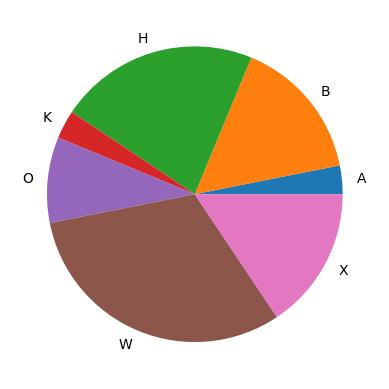

In [18]:
x_axis=sum_df3["COUNT"]
plt.pie(x_axis, labels = sum_df3["Vict Descent"])
# plt.axis("COUNT")
# plt.show()